# Proyek Analisis Data: Product_dataset.csv
- **Nama:** Isky Dwi Aprilianto
- **Email:** iskydwi.aprilianto442@gmail.com
- **ID Dicoding:** Isky Dwi Aprilianto

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana distribusi berat produk di setiap kategori?
- Pertanyaan 2: Apakah jumlah foto produk berpengaruh terhadap panjang deskripsi produk?

## Import Semua Packages/Library yang Digunakan

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pengaturan untuk menampilkan grafik dengan baik
%matplotlib inline


## Data Wrangling

### Gathering Data

In [13]:
# Memuat dataset
data = pd.read_csv('/content/sample_data/products_dataset.csv')

# Melihat beberapa baris pertama data
data.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
**Dataset berisi informasi tentang berbagai produk, termasuk kategori, panjang nama, deskripsi, dan dimensi produk.**

### Assessing Data

In [14]:
# Informasi dasar tentang data
data.info()

# Memeriksa apakah ada nilai yang hilang
data.isnull().sum()

# Melihat statistik deskriptif data numerik
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Terdapat beberapa kolom numerik seperti panjang nama, panjang deskripsi, jumlah foto, berat, dan dimensi produk.

### Cleaning Data

In [15]:
# Mengisi nilai yang hilang pada kolom 'product_name_lenght' dan 'product_description_lenght' dengan median
data['product_name_lenght'] = data['product_name_lenght'].fillna(data['product_name_lenght'].median())
data['product_description_lenght'] = data['product_description_lenght'].fillna(data['product_description_lenght'].median())

# Mengisi nilai yang hilang pada 'product_photos_qty' dengan 0 (asumsi produk tidak memiliki foto)
data['product_photos_qty'] = data['product_photos_qty'].fillna(0)


**Insight:**
- Nilai yang hilang pada kolom panjang nama dan deskripsi diisi dengan nilai median untuk menjaga distribusi data.
- Jumlah foto yang hilang diisi dengan 0 untuk mengindikasikan bahwa produk tidak memiliki foto.

## Exploratory Data Analysis (EDA)

### Explore distribusi berat produk berdasarkan kategori:

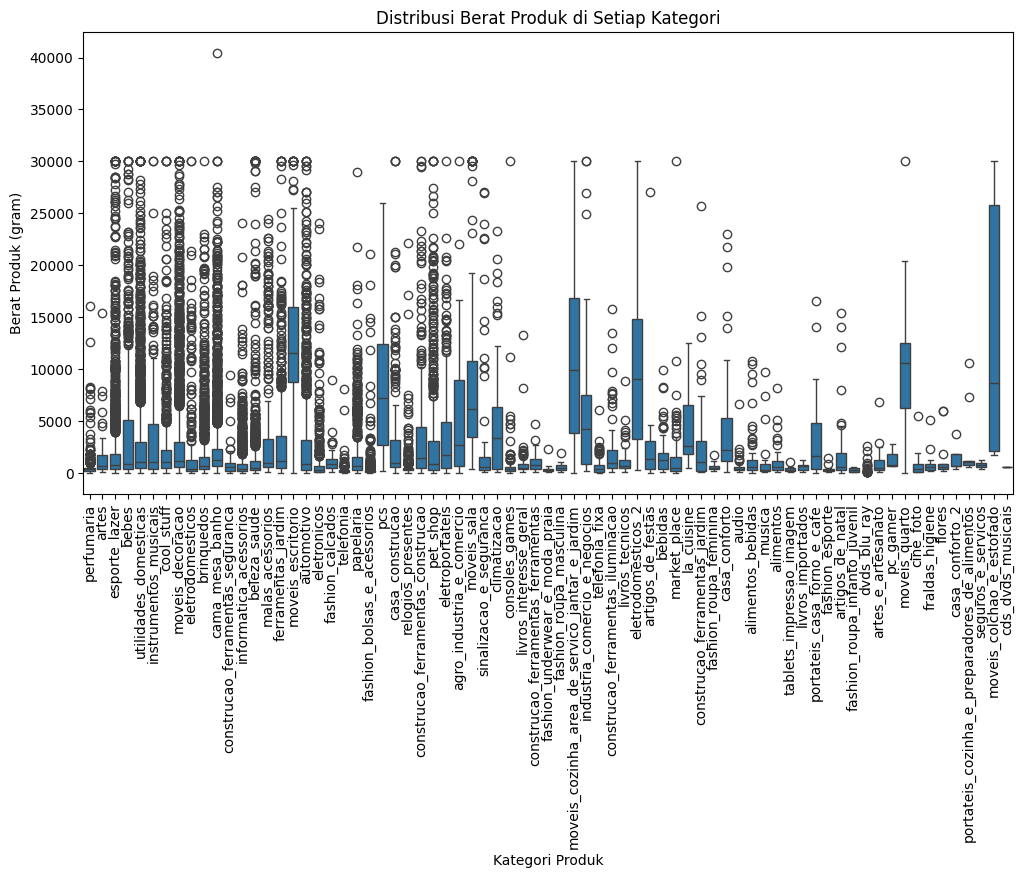

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category_name', y='product_weight_g', data=data)
plt.xticks(rotation=90)
plt.title('Distribusi Berat Produk di Setiap Kategori')
plt.xlabel('Kategori Produk')
plt.ylabel('Berat Produk (gram)')
plt.show()


**Insight:**
- Terdapat variasi berat yang signifikan di antara kategori produk.
- Kategori tertentu memiliki outlier dengan berat yang lebih besar.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi berat produk di setiap kategori?

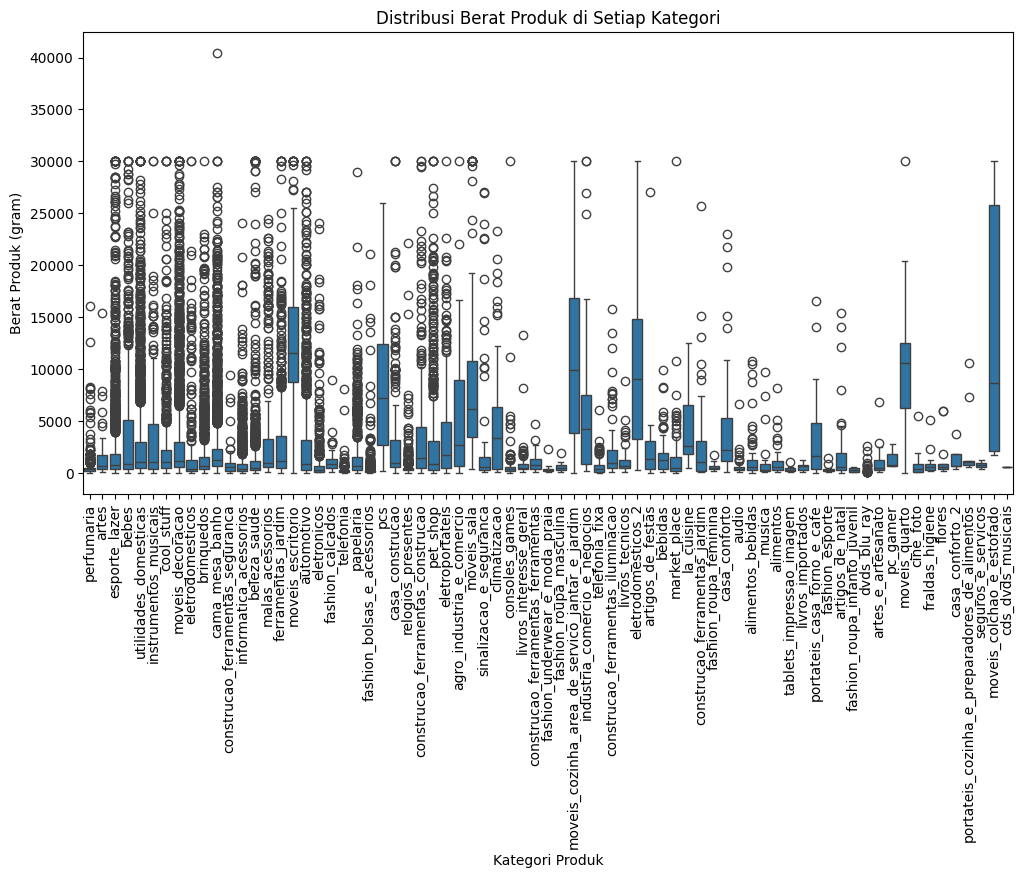

In [17]:
# Plot distribusi berat di setiap kategori (lihat EDA di atas)
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category_name', y='product_weight_g', data=data)
plt.xticks(rotation=90)
plt.title('Distribusi Berat Produk di Setiap Kategori')
plt.xlabel('Kategori Produk')
plt.ylabel('Berat Produk (gram)')
plt.show()


### Pertanyaan 2: Apakah jumlah foto produk berpengaruh terhadap panjang deskripsi produk?

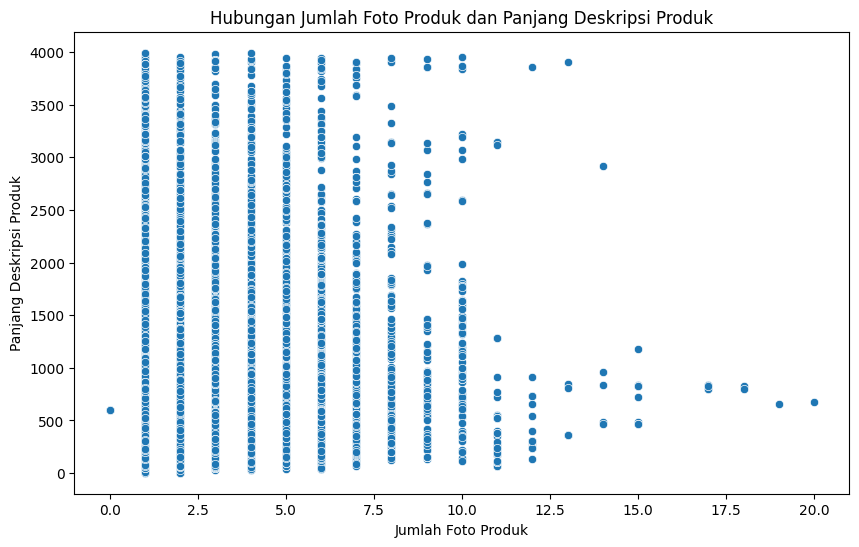

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='product_photos_qty', y='product_description_lenght', data=data)
plt.title('Hubungan Jumlah Foto Produk dan Panjang Deskripsi Produk')
plt.xlabel('Jumlah Foto Produk')
plt.ylabel('Panjang Deskripsi Produk')
plt.show()


**Insight:**
- Tidak terlihat adanya hubungan yang jelas antara jumlah foto dan panjang deskripsi produk.

## Analisis Lanjutan (Opsional)

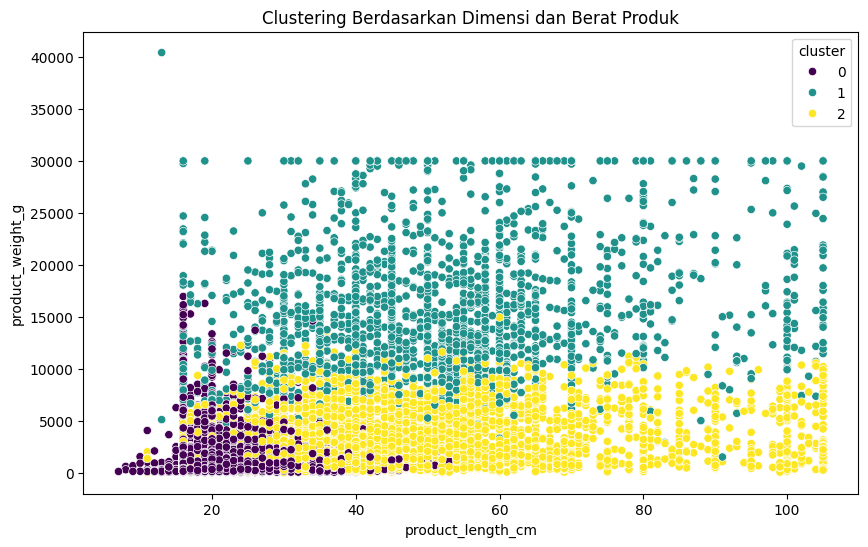

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Memilih fitur numerik untuk clustering
features = data[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']]

# Mengisi nilai yang hilang pada fitur dengan median
features = features.fillna(features.median())

# Standarisasi fitur
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Clustering menggunakan KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_features)
data['cluster'] = kmeans.labels_

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='product_length_cm', y='product_weight_g', hue='cluster', data=data, palette='viridis')
plt.title('Clustering Berdasarkan Dimensi dan Berat Produk')
plt.show()


## Conclusion

- Conclution pertanyaan 1: Distribusi berat produk bervariasi di setiap kategori, dengan beberapa kategori memiliki rentang berat yang jauh lebih besar.
- Conclution pertanyaan 2 : Tidak ditemukan hubungan yang signifikan antara jumlah foto produk dan panjang deskripsi produk.